In [199]:
import pandas as pd
import matplotlib.pyplot as plt
original_df = pd.read_csv("survey_results_public.csv")
df = original_df.copy()

In [200]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


### Select Data

Including 64461 observations on 5 variables:
* Country: Country of residence
* EdLevel: Highest level of formal education completed
* YearsCodePro: Total years of professional coding experience (excluding education)
* Employment: Current employment status
* ConvertedComp: Salary converted to annual USD salaries

In [201]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedComp"]]
df = df.rename({"ConvertedComp": "Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN


### Data Duplication

In [202]:
duplicates = df.duplicated()
print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
64456     True
64457     True
64458     True
64459     True
64460     True
Length: 64461, dtype: bool


In [203]:
# Remove duplicate rows
df = df.drop_duplicates()
print(df)

                  Country                                            EdLevel  \
0                 Germany    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
1          United Kingdom       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2      Russian Federation                                                NaN   
3                 Albania    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
4           United States       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
...                   ...                                                ...   
64438             Morocco                          Primary/elementary school   
64444              Monaco  Secondary school (e.g. American high school, G...   
64446           Australia                          Primary/elementary school   
64450            Bulgaria    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
64453            Thailand                          Primary/elementary school   

           YearsCodePro                

### Data Missing

In [204]:
#check the percent of missing data
df.isnull().sum()*100/df.shape[0]

Country          0.021986
EdLevel          3.657900
YearsCodePro     7.895677
Employment       0.777750
Salary          21.326298
dtype: float64

In [205]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0


In [206]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

## Exploratory Data Analysis

Cleaned dataset include 
* Categorical variables: Country, EdLevel, YearsCodePro, Employment
* Numerical variables: Salary

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27907 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       27907 non-null  object 
 1   EdLevel       27907 non-null  object 
 2   YearsCodePro  27907 non-null  object 
 3   Employment    27907 non-null  object 
 4   Salary        27907 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.3+ MB


### Employment

In [208]:
df = df[df["Employment"] == "Employed full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23967 entries, 7 to 64154
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       23967 non-null  object 
 1   EdLevel       23967 non-null  object 
 2   YearsCodePro  23967 non-null  object 
 3   Salary        23967 non-null  float64
dtypes: float64(1), object(3)
memory usage: 936.2+ KB


### Country

In [209]:
df['Country'].value_counts()

Country
United States     4567
United Kingdom    1800
India             1603
Germany           1527
Canada             974
                  ... 
Benin                1
Fiji                 1
San Marino           1
Guinea               1
Andorra              1
Name: count, Length: 154, dtype: int64

In [210]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [211]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Country
Other                 8103
United States         4567
United Kingdom        1800
India                 1603
Germany               1527
Canada                 974
Brazil                 813
France                 800
Spain                  627
Netherlands            617
Australia              586
Italy                  509
Poland                 490
Sweden                 476
Russian Federation     475
Name: count, dtype: int64

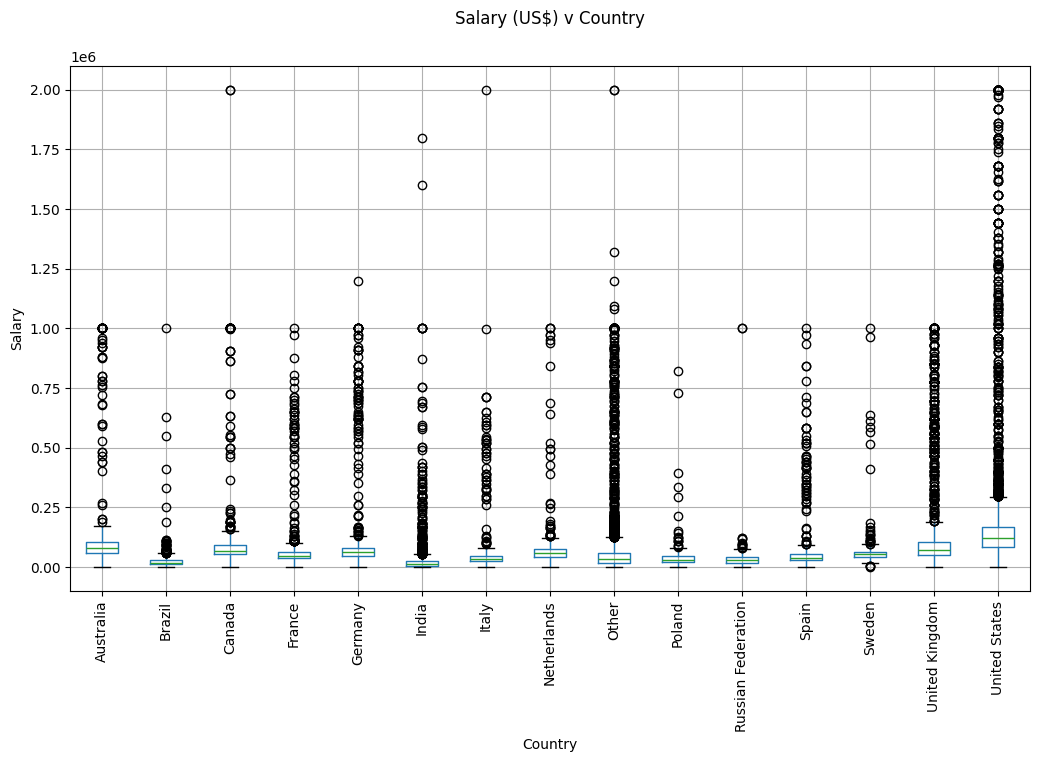

In [212]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [213]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']

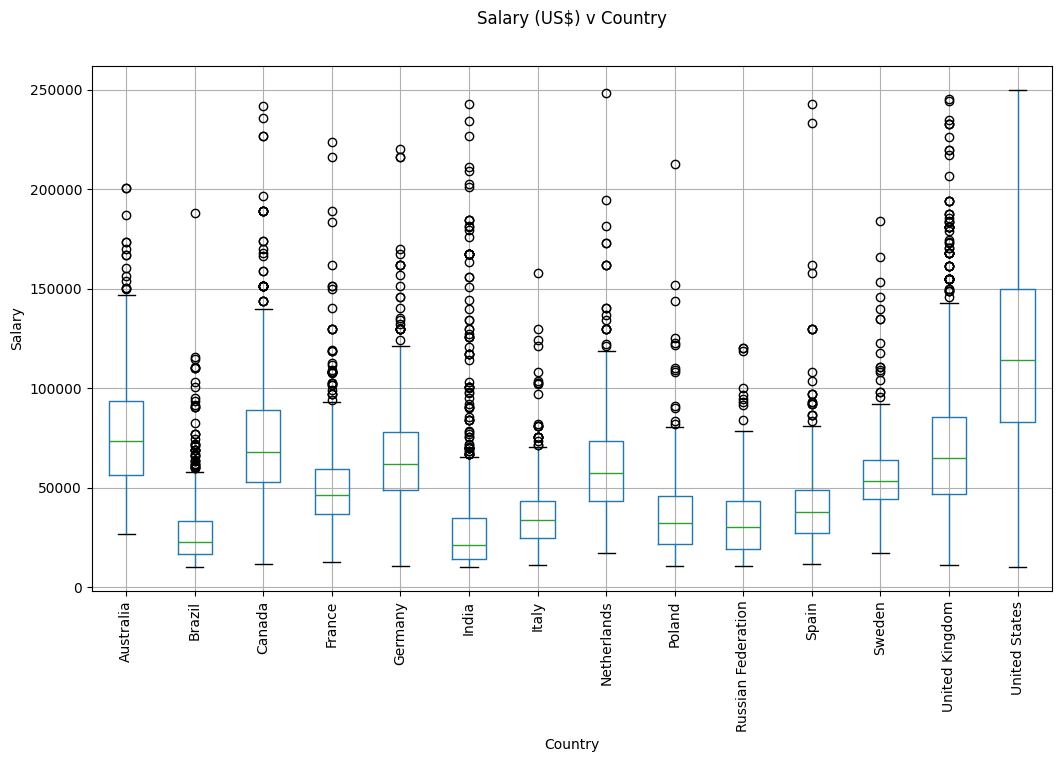

In [214]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

Có thể thấy United States có số lượng đông nhất và mức lương cao nhất

### YearsCodePro


In [215]:
df["YearsCodePro"].unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '12', '29', '6', '28',
       '8', '23', '15', '25', '9', '11', 'Less than 1 year', '5', '21',
       '16', '18', '14', '32', '19', '22', '38', '30', '26', '27', '17',
       '24', '34', '35', '33', '36', '40', '39', 'More than 50 years',
       '31', '37', '41', '45', '42', '44', '43', '50', '49'], dtype=object)

In [216]:
#Clean YearsCodePro
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

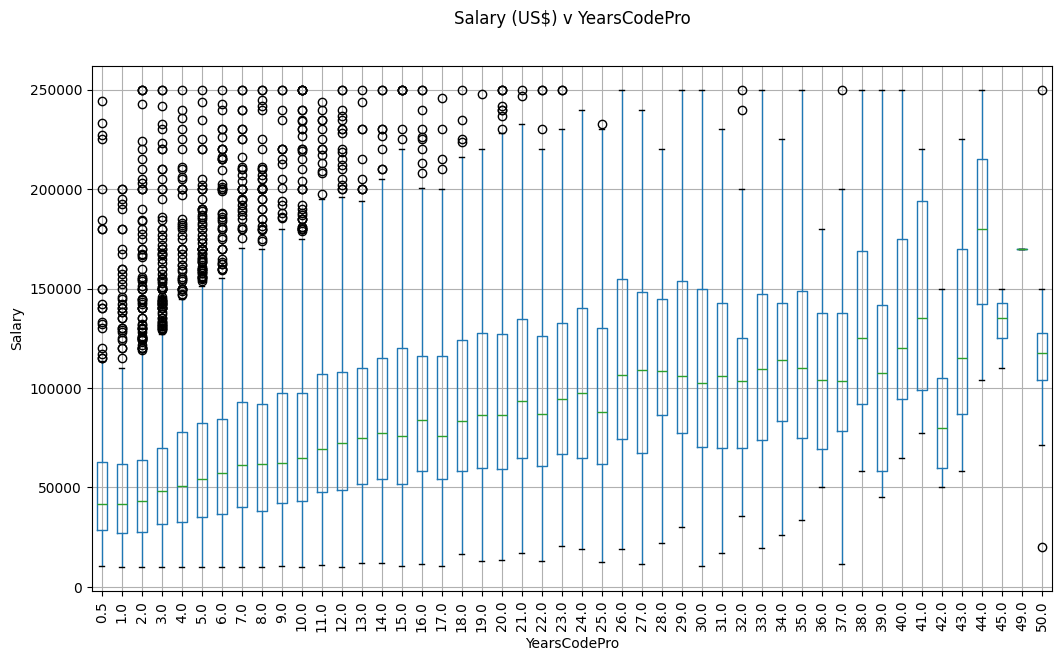

In [217]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'YearsCodePro', ax=ax)
plt.suptitle('Salary (US$) v YearsCodePro')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()


Có thể thấy số năm kinh nghiệm càng cao thì mức lương càng cao

### EdLevel

In [218]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [219]:
#Clean EdLevel
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [220]:
df["EdLevel"].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

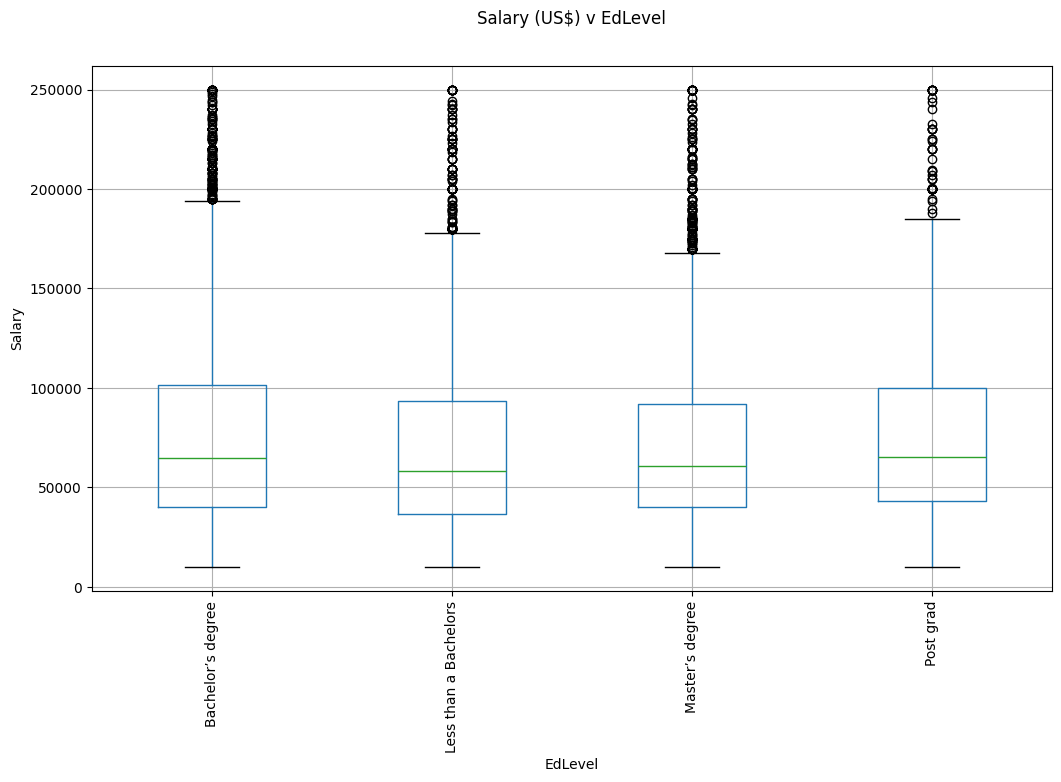

In [221]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'EdLevel', ax=ax)
plt.suptitle('Salary (US$) v EdLevel')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [222]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()
#le.classes_

array([0, 2, 1, 3])

In [223]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([13, 12, 10,  7,  4,  2,  6,  1,  3,  5, 11,  8,  0,  9])

In [224]:
X = df.drop("Salary", axis=1)
y = df["Salary"]
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13693 entries, 7 to 64122
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       13693 non-null  int32  
 1   EdLevel       13693 non-null  int32  
 2   YearsCodePro  13693 non-null  float64
dtypes: float64(1), int32(2)
memory usage: 320.9 KB


In [225]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

Split data with ratio 7:3

In [226]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Choose Models

In [227]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Linear Regression RMSE: ${error:,.02f}")

Linear Regression RMSE: $40,237.79


In [228]:
# Decision Tree Regressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X_train, y_train)
y_pred = dec_tree_reg.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Decision Tree RMSE: ${error:,.02f}")

Decision Tree RMSE: $34,165.13


In [229]:
# Random Forest Regressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X_train, y_train)
y_pred = random_forest_reg.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Random Forest RMSE: ${error:,.02f}")

Random Forest RMSE: $33,489.09


In [230]:
# Grid Search with Decision Tree Regressor
max_depth = [None, 2, 4, 6, 8, 10, 12]
parameters = {"max_depth": max_depth}
regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)
# Model with the best performance
regressor = gs.best_estimator_
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Optimized Decision Tree RMSE: ${error:,.02f}")

Optimized Decision Tree RMSE: $32,730.30


In [231]:
# Example prediction
X = np.array([["United States", 'Master’s degree', 15 ]])
X

array([['United States', 'Master’s degree', '15']], dtype='<U15')

In [232]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X = X.astype(float)
X

array([[13.,  2., 15.]])

In [233]:
y_pred = regressor.predict(X)
y_pred

C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([140671.70588235])

In [234]:
import pickle

In [235]:
#Save model and encoders
data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [236]:
#Load model and encoders
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [237]:
y_pred = regressor_loaded.predict(X)
y_pred

C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([140671.70588235])